<a href="https://colab.research.google.com/github/merrouchi37/Covid-19_detection/blob/master/Covid_19_Testing_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [ ]:
#!cat /proc/cpuinfo

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/app")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Install mlxtend to plot confusion matrix
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3MB 6.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
# loanding test data from numpy arrays
data_val = np.load('data_val.npy')
labels_val = np.load('labels_val.npy')

In [ ]:
# load saved model for test
model = load_model('covid19_models/best_vgg16.h5')
#model = load_model('covid19_models/best_vgg19.h5')
#model = load_model('covid19_models/best_InceptionV3.h5')
#model = load_model('covid19_models/best_resNet50.h5')


In [ ]:
model.evaluate(data_val,labels_val)

10/10 [==============================] - 1s 102ms/step - loss: 0.2240 - acc: 0.9633


[0.22404983639717102, 0.9633333086967468]

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(data_val, batch_size=16)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] evaluating network...


In [ ]:
# show a nicely formatted classification report
print(classification_report(labels_val.argmax(axis=1), predIdxs,
	target_names=['covid','normal','viral']))

              precision    recall  f1-score   support

       covid       0.99      0.98      0.98       100
      normal       0.97      0.98      0.98       100
       viral       0.97      0.97      0.97       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


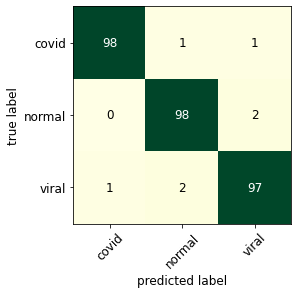

In [ ]:
class_names = ['covid','normal','viral']

#plotting learning curve and confusion matrix
#help(model)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

font = {
		'family':'Times New Roman',
		'size':12
		}

matplotlib.rc('font', **font)
labels = np.argmax(labels_val, axis=1)
mat = confusion_matrix(labels, predIdxs )
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(4,4),  show_absolute=True, class_names=class_names, cmap='YlGn' ) #PuRd 
plt.savefig('matrice_best_vgg16_2.tif',)

In [ ]:
print(labels_val[0])
predIdxs = model.predict(data_val, batch_size=16)
print(predIdxs[0])

[0. 1. 0.]
[3.6010928e-07 9.9999571e-01 3.9054298e-06]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


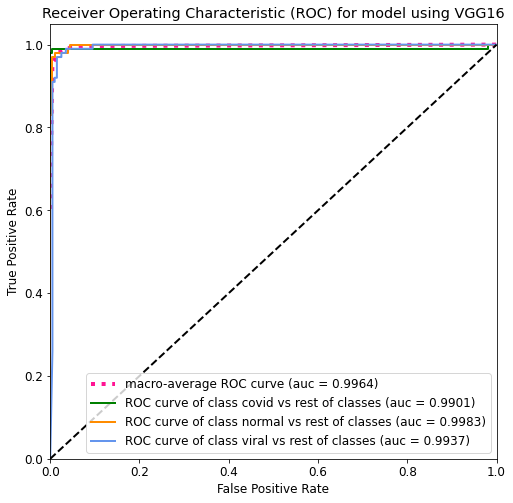

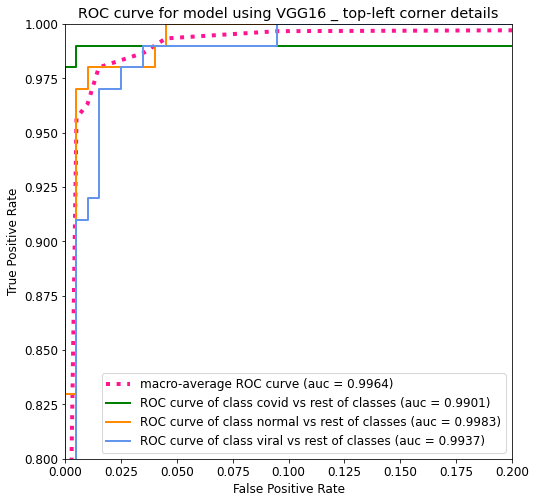

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

class_names = ['covid','normal','viral']
n_classes = 3
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_val[:, i], predIdxs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(labels_val.ravel(), predIdxs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1, figsize=(8,8))
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.4f})'
#               ''.format(roc_auc["micro"]),
#         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (auc = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} vs rest of classes (auc = {1:0.4f})'
             ''.format(class_names[i], roc_auc[i]))

#plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw,
#             label='ROC curve of class {0} (area = {1:0.4f})'
#             ''.format(class_names[0], roc_auc[0]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for model using VGG16')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2,figsize=(8,8))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.4f})'
#               ''.format(roc_auc["micro"]),
#         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (auc = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue']) #cornflowerblue
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} vs rest of classes (auc = {1:0.4f})'
             ''.format(class_names[i], roc_auc[i]))
#plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw,
#             label='ROC curve of class {0} (area = {1:0.4f})'
#             ''.format(class_names[0], roc_auc[0]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for model using VGG16 _ top-left corner details')
plt.legend(loc="lower right")
plt.show()